<a href="https://colab.research.google.com/github/ssrbazpur/Envisioning-Yellow-Taxi-High-Demand-Areas-in-NYC-city/blob/master/Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3><center><b><U>Data Preparation</U></b></center> </h3>
<h4><center><b>Prepared By: Simranjeet Randhawa</b></center> </h4>




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install datalab

In [0]:
from datalab.context import Context

In [0]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/content/drive/My Drive/Data Science/nyc-taxi-265120-baf9a3e4cf9b.json"
%reload_ext google.cloud.bigquery

In [0]:
project_id = 'nyc-taxi-265120' 
from google.cloud import bigquery
client = bigquery.Client(project = project_id)

In [0]:
from google.cloud import bigquery
client = bigquery.Client(project=project_id)

<h3><b> 1. Data Preparation </b></h3>
<p align="justify"> Data preparation is termed as the process of cleaning the data so that the data can be transformed in a form that can be processed and analysed. It is an important step prior to processing and often involves reformatting data, making corrections to data and the combining of data sets to enrich data.
</p>

<h4><b> 1.1 Data Cleaning </b></h4>

<b><u> 2018 First Half Yellow Cab Data Cleaning (Big Query)</u></b>
<p align="justify"> 
<ol><li> Analyse if there is rows with total trip amount =0 ? </li>
<li>Is there rows with pick up time > drop off time.</li><li>  Analyse rows which have 0 passenger count.</li>
</ol>
</p>

In [0]:
# if numpy is not installed already : pip3 install numpy
import numpy as np
# matplotlib: used to plot graphs
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams

<b> Finding the number of trips where amount given by passenger is less than zero.</b>

In [0]:
query = """
SELECT tpep_pickup_datetime,	tpep_dropoff_datetime,	passenger_count,	trip_distance,PULocationID,	DOLocationID,fare_amount FROM `nyc-taxi-265120.NYC.2018firsthalf` where total_amount < 0 
"""
df_head = client.query(query).to_dataframe()

In [0]:
df_head.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount
0,2018-01-11 09:55:06+00:00,2018-01-11 09:55:36+00:00,2,0.12,42,42,-2.5
1,2018-01-11 14:15:16+00:00,2018-01-11 14:15:30+00:00,2,0.06,24,43,-2.5
2,2018-01-12 10:07:42+00:00,2018-01-12 10:08:39+00:00,3,0.14,33,33,-2.5
3,2018-01-12 14:04:39+00:00,2018-01-12 14:05:09+00:00,1,0.06,260,260,-2.5
4,2018-01-12 15:00:44+00:00,2018-01-12 15:01:00+00:00,1,0.00,261,261,-2.5


In [0]:
print("Number of rows with amount of trip <0:")
print(df_head.shape[0])

Number of rows with amount of trip <0:
29860


In [0]:
query = """
SELECT * FROM `nyc-taxi-265120.NYC.2018firsthalf` LIMIT 10000
"""
df_head = client.query(query).to_dataframe()

In [11]:
df_head.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.504900,1.489400,0.388537,1.037200,168.243000,170.657800,1.702600,3.090250,0.416830,0.482600,0.519640,0.036067,0.291120,4.837872
std,0.500001,1.182044,1.429983,1.034274,69.474621,69.068742,0.647762,0.807586,0.413448,0.118948,2.876293,0.885342,0.068232,3.204282
min,1.000000,0.000000,0.000000,1.000000,4.000000,4.000000,1.000000,-3.000000,-1.000000,-0.500000,-3.000000,0.000000,-0.300000,-6.300000
25%,1.000000,1.000000,0.130000,1.000000,125.000000,132.000000,1.000000,3.000000,0.000000,0.500000,0.000000,0.000000,0.300000,4.300000
50%,2.000000,1.000000,0.300000,1.000000,163.000000,164.000000,2.000000,3.500000,0.500000,0.500000,0.000000,0.000000,0.300000,4.800000
75%,2.000000,1.000000,0.400000,1.000000,236.000000,236.000000,2.000000,3.500000,1.000000,0.500000,0.950000,0.000000,0.300000,5.350000
max,2.000000,6.000000,47.400000,99.000000,265.000000,265.000000,4.000000,3.500000,1.300000,0.500000,146.000000,58.000000,0.300000,149.300000


<b> Histogram </b>

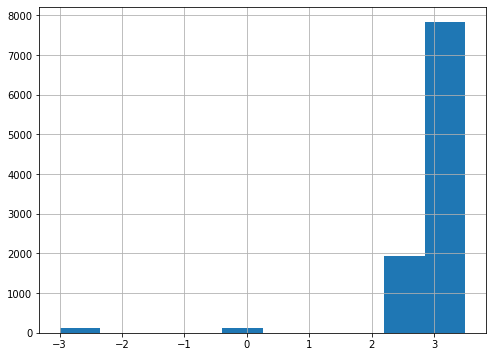

In [25]:
#Getting to know there are negative in the price given by passenger from sample of dataset only(For exact count I used BigQuery as the data cannot be analysed using pandas dataframe)
%matplotlib inline
import matplotlib.pyplot as plt # visualization
import seaborn as sns
f, ax = plt.subplots(figsize=(8, 6))
df_head.fare_amount.hist()
plt.show()

<p align="justify"> There are 29860 rows in 2018 First half dataset where amount trip is less than 0 which is not possible as there is no online wallet system that NYC city taxi used in 2018 nor 2019. Hence this must be the possible outliers or there must be erroneous entry in the amount column. I decided to normalise the value and keep it.</p>

<p align="justify"> Trip distance is greater than zero and this Hexbin plot gives me the information that only certain zones have move trip_distance associated to it</p>

<b> HexBin plot (to analyse the relationship between two variable</b>

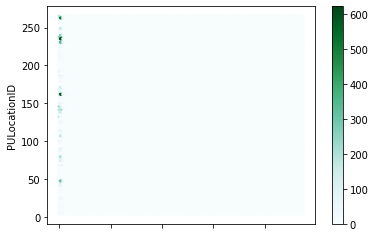

In [30]:
#Getting to know there are negative in the price given by passenger from sample of dataset only(For exact count I used BigQuery as the data cannot be analysed using pandas dataframe)
%matplotlib inline
import matplotlib.pyplot as plt # visualization
import seaborn as sns
df_head.plot.hexbin(x="trip_distance",y="PULocationID")
plt.show()

<b>Density Plot</b>

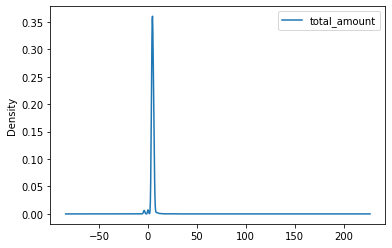

In [31]:
#Getting to know there are negative in the price given by passenger from sample of dataset only(For exact count I used BigQuery as the data cannot be analysed using pandas dataframe)
%matplotlib inline
import matplotlib.pyplot as plt # visualization
import seaborn as sns
df_head[["total_amount"]].plot.kde()
plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning:

invalid value encountered in log



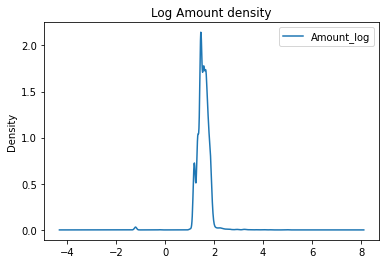

In [33]:
#Referred: Profressor Dr. Alireza Manashty
import numpy as np
df_head['Amount_log']=np.log(df_head.total_amount)
df_head[["Amount_log"]][np.isfinite(df_head.Amount_log)].dropna().plot.kde()
plt.title("Log Amount density")
plt.show()

<b> Finding the number of pickups where pickup time is greater than drop off time</b>

In [0]:
query = """
SELECT tpep_pickup_datetime,	tpep_dropoff_datetime,	passenger_count,	trip_distance,PULocationID,	DOLocationID,fare_amount FROM `nyc-taxi-265120.NYC.2018firsthalf` where tpep_pickup_datetime > tpep_dropoff_datetime 
"""
df = client.query(query).to_dataframe()

In [0]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount
0,2018-01-23 13:12:19+00:00,2018-01-23 00:28:25+00:00,2,20.9,132,244,52.0
1,2018-02-09 09:50:19+00:00,2018-02-09 04:48:28+00:00,1,1.3,90,113,6.0
2,2018-02-09 15:57:17+00:00,2018-02-09 15:14:23+00:00,1,1.9,234,48,14.0
3,2018-02-04 15:15:17+00:00,2018-02-03 16:06:36+00:00,2,20.2,132,151,52.0
4,2018-02-11 15:15:01+00:00,2017-12-24 17:09:53+00:00,2,4.7,246,66,25.0


In [0]:
print("Number of rows where pickup time is greater than drop off:")
print(df.shape[0])

Number of rows where pickup time is greater than drop off:
18


<p align="justify"> I decided to remove these rows as they are certainty the outliers and will not make much difference</p>

<b> Finding the number of pickups where there are no passengers</b>

In [0]:
query = """
SELECT * FROM `nyc-taxi-265120.NYC.2018firsthalf` limit 10000
"""
df = client.query(query).to_dataframe()

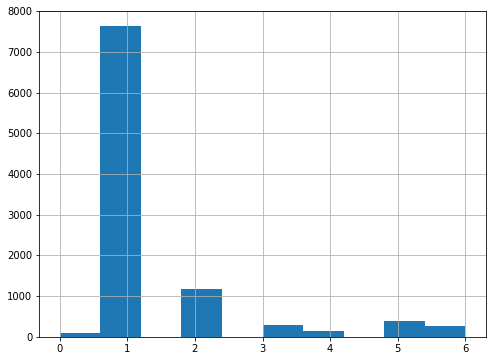

In [50]:
#Getting to know there are negative in the price given by passenger from sample of dataset only(For exact count I used BigQuery as the data cannot be analysed using pandas dataframe)
%matplotlib inline
import matplotlib.pyplot as plt # visualization
import seaborn as sns
f, ax = plt.subplots(figsize=(8, 6))
df.passenger_count.hist()
plt.show()

Now using Big Query finding the extact number of rows

In [0]:
query = """
SELECT tpep_pickup_datetime,	tpep_dropoff_datetime,	passenger_count,	trip_distance,PULocationID,	DOLocationID,fare_amount FROM `nyc-taxi-265120.NYC.2018firsthalf` where passenger_count = 0 
"""
df = client.query(query).to_dataframe()

In [46]:
print("Number of pickups where there are no passengers:")
print(df.shape[0])

Number of pickups where there are no passengers:
402117


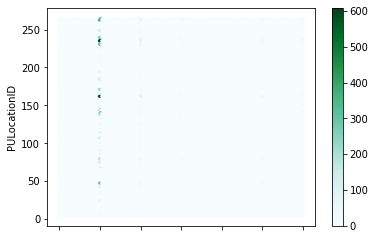

In [51]:
#Getting to know there are negative in the price given by passenger from sample of dataset only(For exact count I used BigQuery as the data cannot be analysed using pandas dataframe)
%matplotlib inline
import matplotlib.pyplot as plt # visualization
import seaborn as sns
df_head.plot.hexbin(x="passenger_count",y="PULocationID")
plt.show()

This can be due to the reason the passenger booked and then quicly canceled the trip.

In [0]:
query = """
SELECT  tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,PULocationID,DOLocationID,total_amount FROM `nyc-taxi-265120.NYC.2018firsthalf` LIMIT 10000
"""
df = client.query(query).to_dataframe()

<b> Finding the number of pickups where duration is more than 12 hours</b>

In [0]:
sns.boxplot(y="total_amount", data =df)
plt.show()

Moving onto the Trip duration, according to NYC Taxi & Limousine Commision Regulations the maximum allowed trip duration in a 24 hour interval is 12 hours. So selecting only the data points whose trip times is greater than 1 and less than 720 minutes (12 hours). Given below is the PDF of log-trip-times along with its Normal Q-Q plot which says that the data follows a good normal distribution.<br>
<IMG SRC="https://github.com/ssrbazpur/Envisioning-Yellow-Taxi-High-Demand-Areas-in-NYC-city/blob/master/Screenshots/log_times.png?raw=true" heigh=400 width=400>

In [0]:
query = """
SELECT  tpep_pickup_datetime,	tpep_dropoff_datetime,	passenger_count,	trip_distance,PULocationID,	DOLocationID,fare_amount FROM `nyc-taxi-265120.NYC.2018firsthalf` WHERE TIMESTAMP_DIFF(tpep_dropoff_datetime,tpep_pickup_datetime,HOUR)>12 
"""
df = client.query(query).to_dataframe()

In [0]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount
0,2018-01-03 20:45:14+00:00,2018-01-04 20:43:04+00:00,7,0.0,4,4,0.3
1,2018-02-05 16:41:27+00:00,2018-02-06 16:40:01+00:00,9,0.0,186,186,9.0
2,2018-04-03 05:17:07+00:00,2018-04-04 00:00:00+00:00,9,0.0,265,265,92.0
3,2018-03-18 14:58:11+00:00,2018-03-19 14:53:29+00:00,0,0.0,265,265,200.0
4,2018-05-11 09:18:52+00:00,2018-05-12 09:17:43+00:00,7,0.0,132,132,70.7


In [0]:
print(df.shape[0])

104528


<b><u> 2018 Second Half Yellow Cab Data Cleaning (Big Query)</u></b>
<p align="justify"> 
<ol><li> Analyse if there is rows with total trip amount =0 ? </li>
<li>Is there rows with pick up time > drop off time.</li><li>  Analyse rows which have 0 passenger count.</li>
</ol>
</p>

<b> Finding the number of trips where amount given by passenger is less than zero.</b>

In [0]:
query = """
SELECT tpep_pickup_datetime,	tpep_dropoff_datetime,	passenger_count,	trip_distance,PULocationID,	DOLocationID,fare_amount FROM `nyc-taxi-265120.NYC.2018SecondHalf` where total_amount <= 0 
"""
df = client.query(query).to_dataframe()

In [0]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount
0,2018-08-04 21:30:09,2018-08-04 22:01:18,1,3.02,232,80,0.0
1,2018-08-05 19:37:02,2018-08-05 19:37:02,1,0.00,129,264,0.0
2,2018-08-06 00:06:13,2018-08-06 00:17:28,1,3.65,66,249,0.0
3,2018-08-06 06:38:01,2018-08-06 06:45:13,5,2.97,65,80,0.0
4,2018-08-04 18:24:14,2018-08-04 18:24:42,2,0.10,133,133,-2.5


In [0]:
print("Number of rows with amount of trip <=0:")
print(df.shape[0])

Number of rows with amount of trip <=0:
45192


In [0]:
query = """
SELECT * FROM `nyc-taxi-265120.NYC.2018SecondHalf` LIMIT 10000
"""
df = client.query(query).to_dataframe()

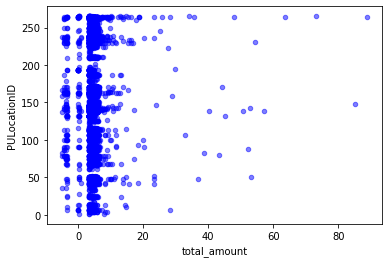

In [69]:
#Scatter plot that gives the indication we are Zone ID where the total_amount received is less than 0.
df.plot(kind='scatter', x='total_amount', y='PULocationID',alpha = 0.5,color = 'blue')

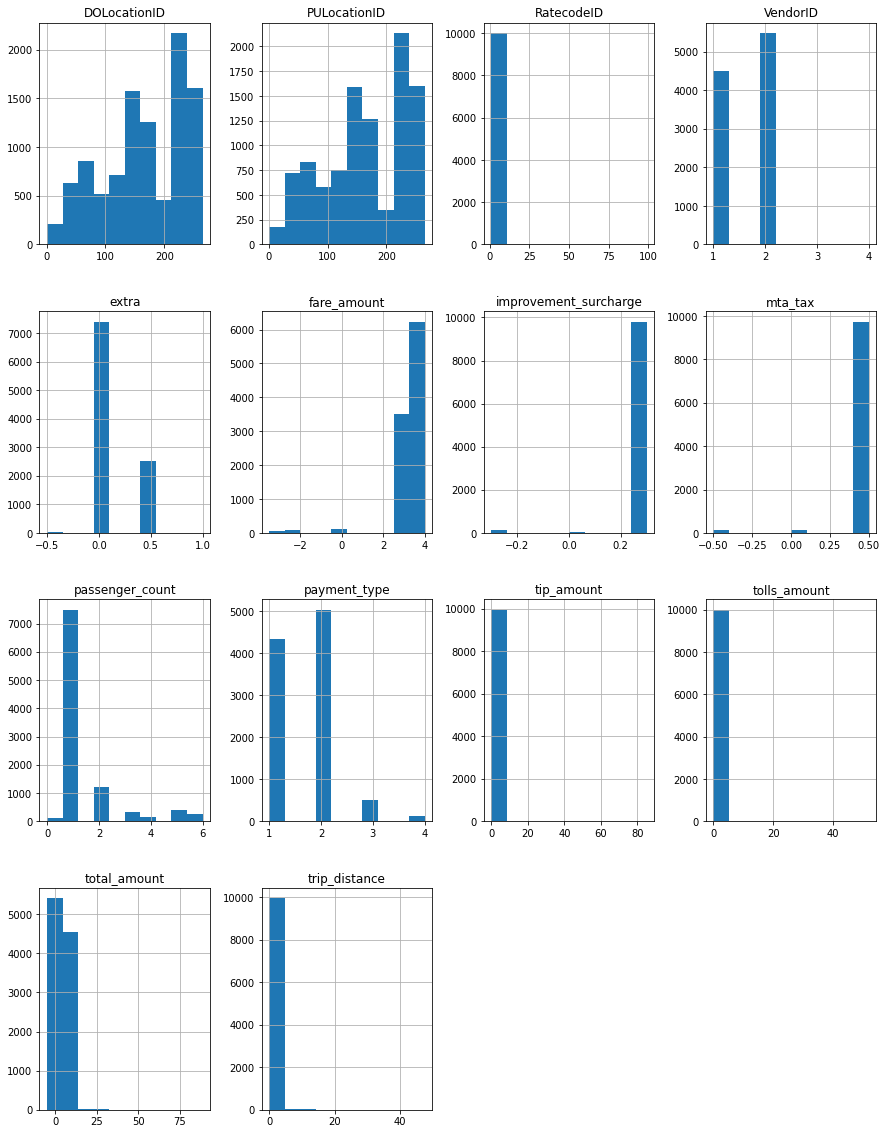

<Figure size 432x288 with 0 Axes>

In [73]:
# histograms
df.hist(figsize=(15,20));
plt.figure();

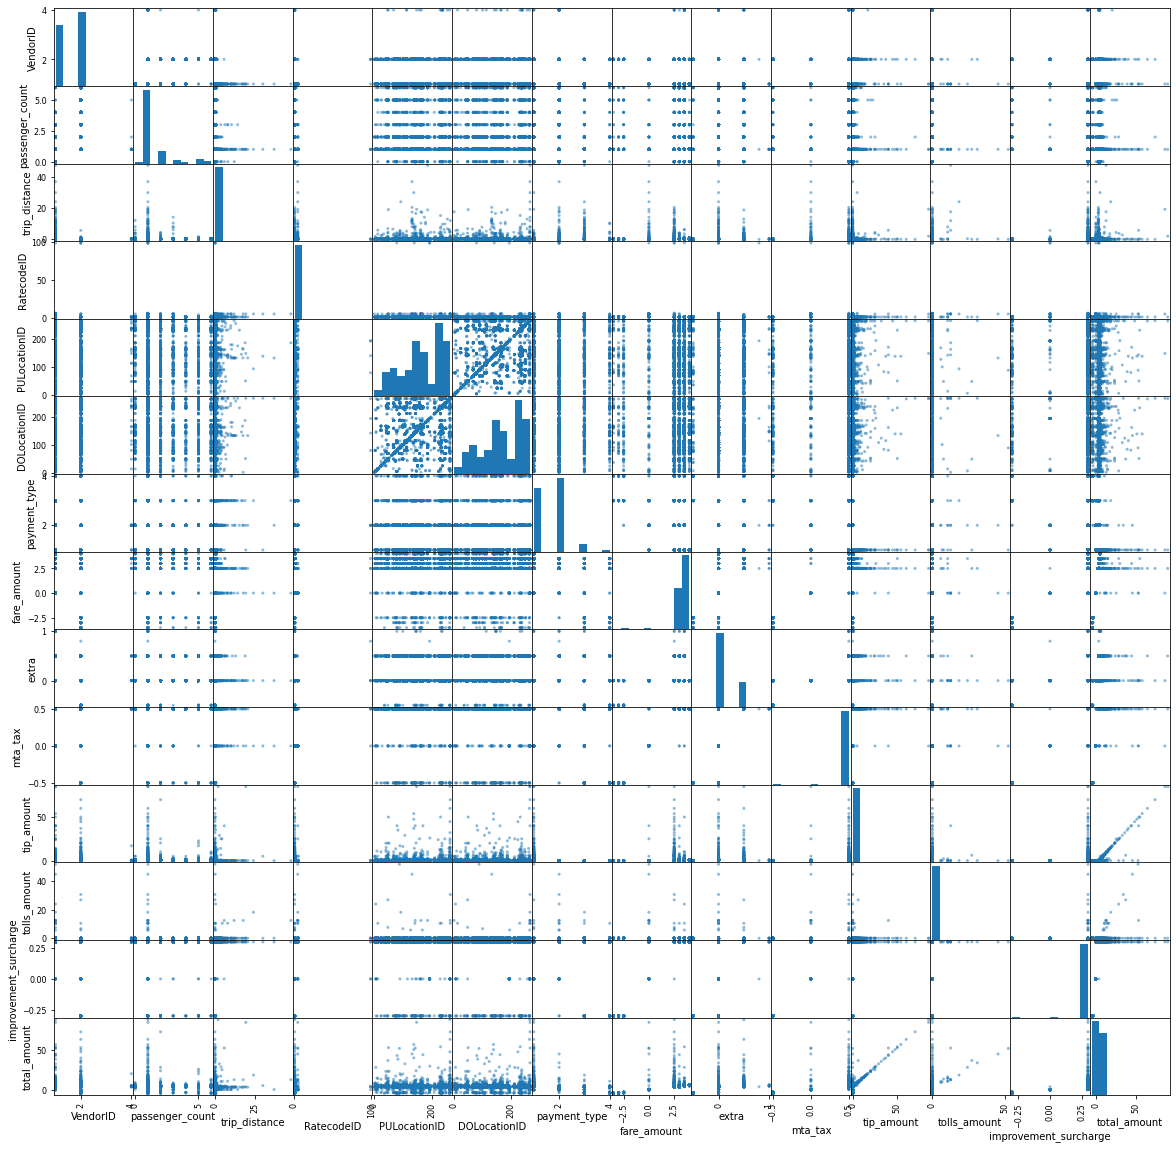

<Figure size 432x288 with 0 Axes>

In [75]:
# scatter plot matrix
pd.plotting.scatter_matrix(df,figsize=(20,20))
plt.figure();

<b> Finding the number of pickups where pickup time is greater than drop off time</b>

In [0]:
query = """
SELECT count(*) FROM `nyc-taxi-265120.NYC.2018SecondHalf` where tpep_pickup_datetime > tpep_dropoff_datetime 
"""
df = client.query(query).to_dataframe()

print("Number of rows where pickup time is greater than drop off:")
print(df["f0_"][0])

Number of rows where pickup time is greater than drop off:
1026


<b> Finding the number of pickups where there are no passengers</b>

In [0]:

query = """
SELECT count(*) FROM `nyc-taxi-265120.NYC.2018SecondHalf` where passenger_count = 0 
"""
df = client.query(query).to_dataframe()

print("Number of pickups where there are no passengers:")
print(df["f0_"][0])


Number of pickups where there are no passengers:
530950


<b><u> 2019 First Half Yellow Cab Data Cleaning (Big Query)</u></b>
<p align="justify"> 
<ol><li> Analyse if there is rows with total trip amount =0 ? </li>
<li>Is there rows with pick up time > drop off time.</li><li>  Analyse rows which have 0 passenger count.</li>
</ol>
</p>

In [0]:
query = """
SELECT * FROM `nyc-taxi-265120.NYC.2019firsthalf` LIMIT 10000
"""
df = client.query(query).to_dataframe()

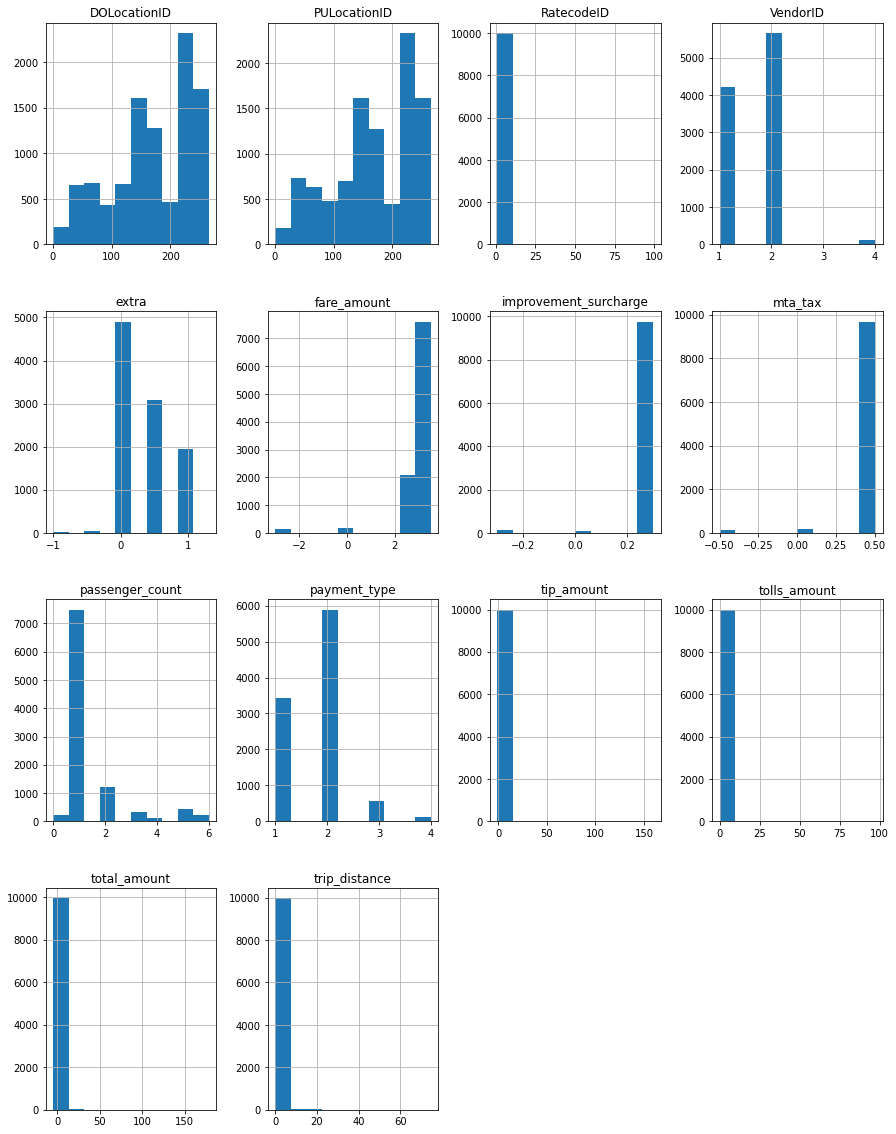

<Figure size 432x288 with 0 Axes>

In [77]:
# histograms
df.hist(figsize=(15,20));
plt.figure();

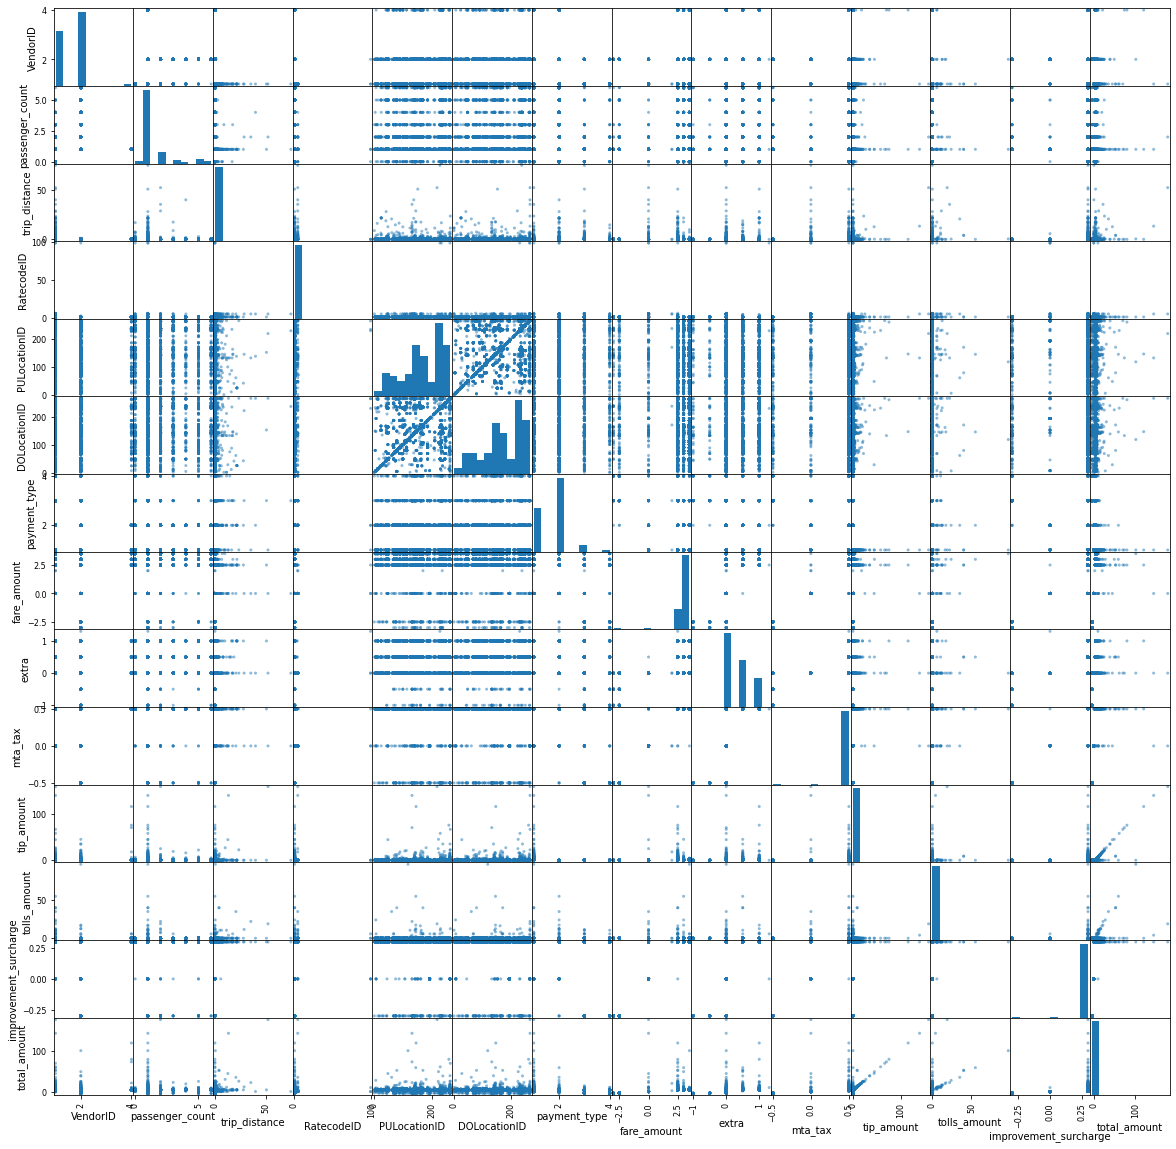

<Figure size 432x288 with 0 Axes>

In [78]:
# scatter plot matrix
pd.plotting.scatter_matrix(df,figsize=(20,20))
plt.figure();

In [0]:
query = """
SELECT tpep_pickup_datetime,	tpep_dropoff_datetime,	passenger_count,	trip_distance,PULocationID,	DOLocationID,fare_amount FROM `nyc-taxi-265120.NYC.2019firsthalf` where total_amount < 0 
"""
df = client.query(query).to_dataframe()

In [0]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount
0,2019-01-03 17:56:33,2019-01-03 17:56:41,1,0.05,166,166,-2.5
1,2019-01-03 17:09:38,2019-01-03 17:10:03,1,0.18,157,160,-2.5
2,2019-01-04 16:06:11,2019-01-04 16:06:25,1,0.00,152,152,-2.5
3,2019-01-04 16:25:35,2019-01-04 16:25:46,1,0.00,197,197,-2.5
4,2019-01-04 17:21:52,2019-01-04 17:21:57,1,0.00,226,226,-2.5


In [0]:
print("Number of rows with amount of trip <0:")
print(df.shape[0])

Number of rows with amount of trip <0:
67963


In [0]:
query = """
SELECT tpep_pickup_datetime,	tpep_dropoff_datetime,	passenger_count,	trip_distance,PULocationID,	DOLocationID,fare_amount FROM `nyc-taxi-265120.NYC.2019firsthalf` where tpep_pickup_datetime > tpep_dropoff_datetime LIMIT 10000
"""
df = client.query(query).to_dataframe()

print("Number of rows where pickup time is greater than drop off:")
print(df.shape[0])

Number of rows where pickup time is greater than drop off:
18


In [0]:
query = """
SELECT count(*) FROM `nyc-taxi-265120.NYC.2019firsthalf` where passenger_count = 0 LIMIT 10000
"""
df = client.query(query).to_dataframe()
print("Number of pickups where there are no passengers:")
print(df["f0_"][0])

Number of pickups where there are no passengers:
785404


<b><u> 2019 Second Half Yellow Cab Data Cleaning (Big Query)</u></b>
<p align="justify"> 
<ol><li> Analyse if there is rows with total trip amount =0 ? </li>
<li>Is there rows with pick up time > drop off time.</li><li>  Analyse rows which have 0 passenger count.</li>
</ol>
</p>

In [0]:
#Visulizing sample of Data Points
query = """
SELECT * FROM `nyc-taxi-265120.NYC.2019secondhalf` LIMIT 10000
"""
df = client.query(query).to_dataframe()


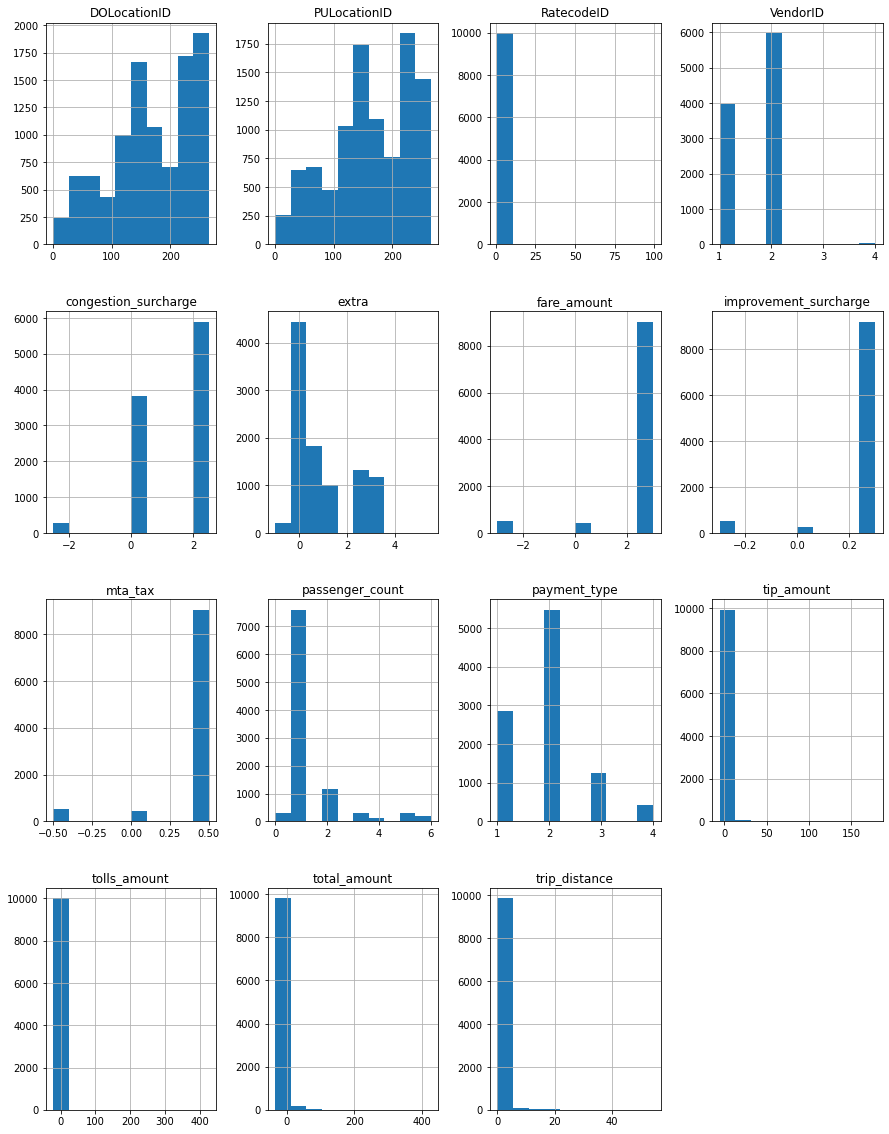

<Figure size 432x288 with 0 Axes>

In [84]:
# histograms
df.hist(figsize=(15,20));
plt.figure();

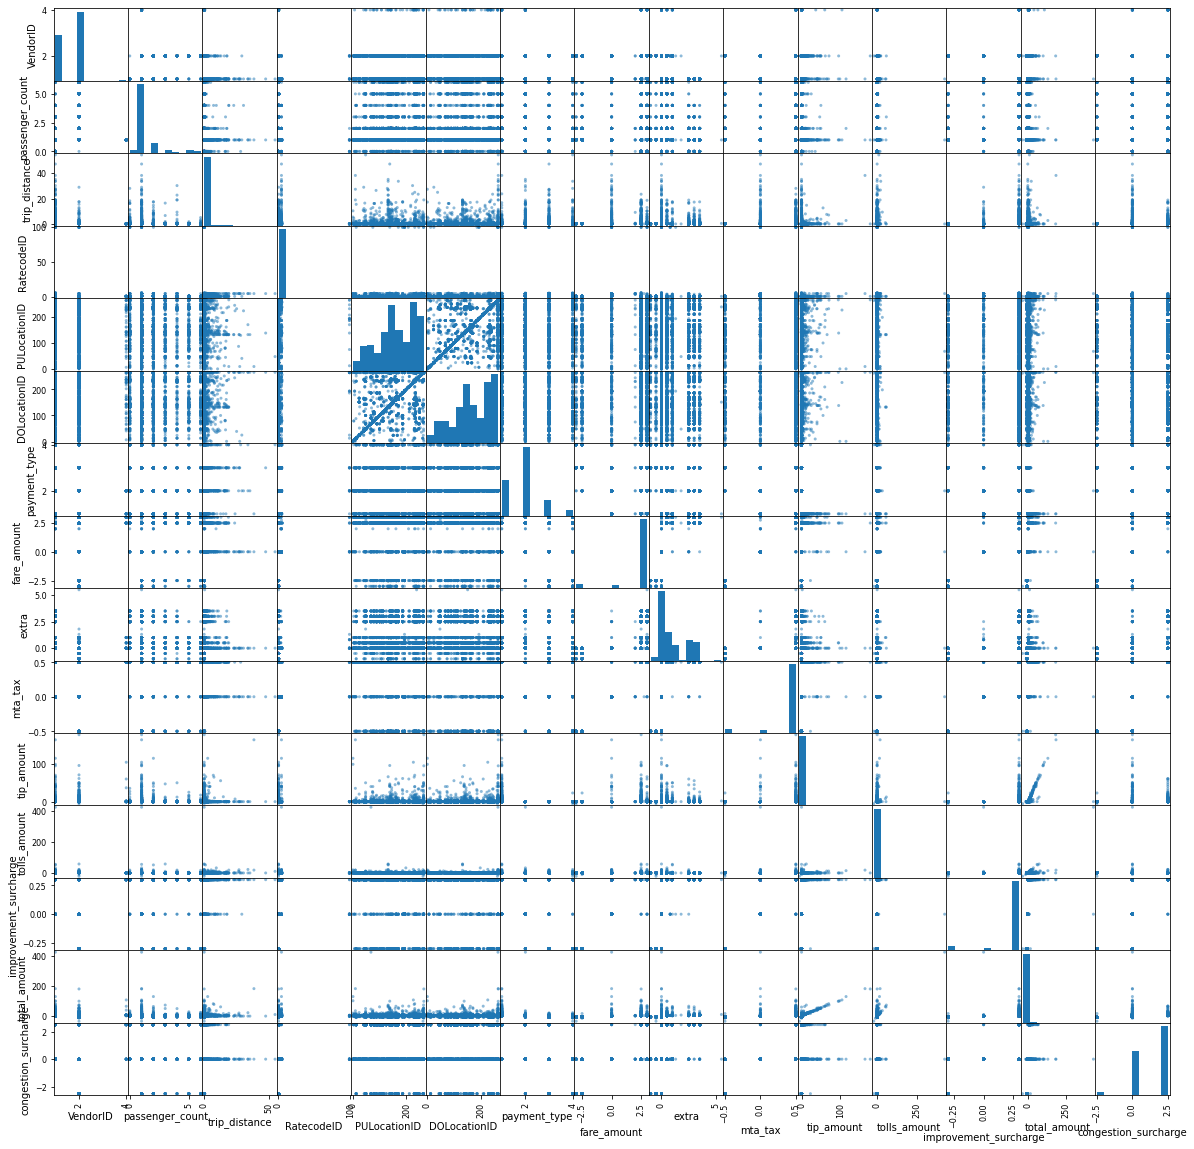

<Figure size 432x288 with 0 Axes>

In [85]:
# scatter plot matrix
pd.plotting.scatter_matrix(df,figsize=(20,20))
plt.figure();

<b> Joint Plot used to study the distribution</b>

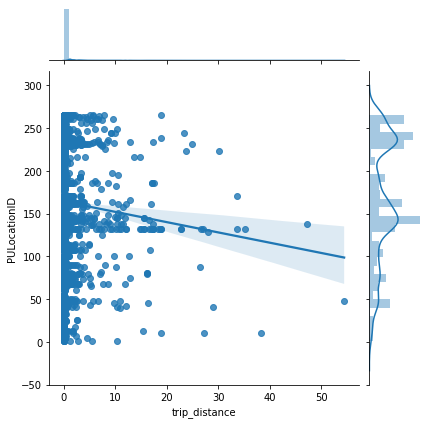

In [87]:
sns.jointplot(x='trip_distance',y='PULocationID' ,data=df, kind='reg');

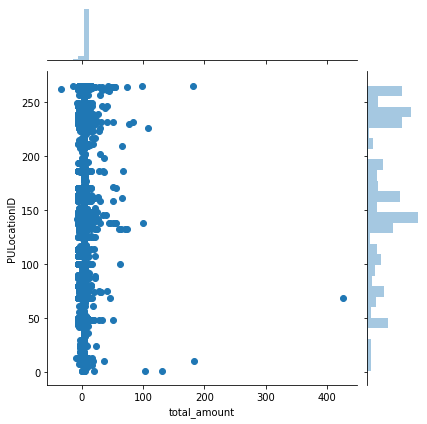

In [91]:
sns.jointplot(x='total_amount',y='PULocationID' ,data=df);

In [0]:
query = """
SELECT tpep_pickup_datetime,	tpep_dropoff_datetime,	passenger_count,	trip_distance,PULocationID,	DOLocationID,fare_amount FROM `nyc-taxi-265120.NYC.2019secondhalf` where total_amount <= 0 
"""
df = client.query(query).to_dataframe()


In [0]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount
0,2019-07-01 07:04:53,2019-07-01 07:04:53,1.0,0.0,77.0,264.0,0.0
1,2019-07-01 09:10:24,2019-07-01 09:10:24,1.0,0.0,63.0,264.0,0.0
2,2019-07-01 09:56:06,2019-07-01 09:59:07,1.0,0.0,207.0,207.0,0.0
3,2019-07-01 11:33:44,2019-07-01 11:33:44,1.0,0.0,205.0,264.0,0.0
4,2019-07-01 12:47:33,2019-07-01 12:48:34,1.0,0.0,207.0,207.0,0.0


In [0]:
print("Number of rows with amount of trip <=0:")
print(df.shape[0])

Number of rows with amount of trip <=0:
112402


In [0]:
query = """
SELECT * FROM `nyc-taxi-265120.NYC.2019secondhalf` where tpep_pickup_datetime > tpep_dropoff_datetime 
"""
df = client.query(query).to_dataframe()

print("Number of rows where pickup time is greater than drop off:")
print(df["f0_"][0])

In [0]:
query = """
SELECT count(*) FROM `nyc-taxi-265120.NYC.2019secondhalf` where passenger_count = 0 
"""
df = client.query(query).to_dataframe()
print("Number of pickups where there are no passengers:")
print(df["f0_"][0])

<b><u> INNER JOIN (Eliminating out of Bounds Location if exists)</u></b>

Eliminaing out of Bound Location with the help of INNER JOIN.<br>
<ol><li>
Table A- Taxi Trips Data </li>
<li>
Table B- Zone Data</li>
</ol>

<img src="https://helloacm.com/wp-content/uploads/2019/04/sql-joins-venn-diagrams-inner-join.png"/>

The INNER JOIN keyword selects all rows from both tables as long as there is a match between the columns. It gives only the trips pickups in the NYC region.</p>

In [0]:
#Sample showing how INNER JOIN can be done using Big Query.
query = """
with td as(
WITH AB AS
(
SELECT  CAST(tpep_pickup_datetime AS DATETIME) AS PICKUP,* FROM `nyc-taxi-265120.NYC.2019firsthalf` where total_amount>0
)  
SELECT  PICKUP,CAST(EXTRACT (YEAR from PICKUP) AS STRING) AS year,EXTRACT (DAYOFYEAR from PICKUP) AS daynumber,EXTRACT (HOUR from PICKUP) AS hour, cast(PULocationID as STRING) as LOCATION,COUNT(*) AS numtrips FROM AB group by PICKUP,year,daynumber,hour,LOCATION),points AS
(SELECT *,ST_CENTROID(zone_geom) as p FROM `bigquery-public-data.new_york_taxi_trips.taxi_zone_geom`)
SELECT cast(DATE(td.PICKUP) as STRING) AS A1,
points.zone_id,CAST(TIME(DATETIME_TRUNC(td.PICKUP, HOUR)) as string) rounded_to_hour,
SUM(td.numtrips) as label,
FROM  td 

INNER JOIN 

points ON points.zone_id=td.LOCATION AND
eXTRACT (YEAR from PICKUP) =2018 AND td.daynumber<150
group by zone_id,A1,rounded_to_hour
"""
df1 = client.query(query).to_dataframe()

<h4> <b>5.2 Data Wrangling </b></h4>
<p align="justify"> Data wrangling which is also referred as data munging.The main moto transform data into a format that is more appropriate and considered more valuable.</p>
<b><u> 2018 Data Wrangling</u></b>

<p align="justify">Add columns: year, month, weekday name, and hour using BIg Query</p>

In [0]:
query = """
with td as(
WITH AB AS
(
SELECT  CAST(tpep_pickup_datetime AS DATETIME) AS PICKUP,* FROM `nyc-taxi-265120.NYC.2018firsthalf` where total_amount>0 or  tpep_pickup_datetime < tpep_dropoff_datetime or  TIMESTAMP_DIFF(tpep_dropoff_datetime,tpep_pickup_datetime,HOUR)>12 
)  
SELECT  PICKUP,CAST(EXTRACT (YEAR from PICKUP) AS STRING) AS year,EXTRACT (DAYOFYEAR from PICKUP) AS daynumber,EXTRACT (HOUR from PICKUP) AS hour, cast(PULocationID as STRING) as LOCATION,COUNT(*) AS numtrips FROM AB group by PICKUP,year,daynumber,hour,LOCATION),points AS
(SELECT *,ST_CENTROID(zone_geom) as p FROM `bigquery-public-data.new_york_taxi_trips.taxi_zone_geom`)
SELECT 
cast(DATE(td.PICKUP) as STRING) AS A1,
points.zone_id,
CAST(TIME(DATETIME_TRUNC(td.PICKUP, HOUR)) as string) rounded_to_hour,
SUM(td.numtrips) as label,
FROM  td INNER JOIN points ON points.zone_id=td.LOCATION AND
eXTRACT (YEAR from PICKUP) =2018 
group by zone_id,A1,rounded_to_hour
"""
df1 = client.query(query).to_dataframe()

In [0]:
import pandas as pd
df1["time"]=pd.to_datetime(df1['A1'] + ' ' + df1['rounded_to_hour'])


<p> <b>Binning so that I can get a window of 1 hr for each zone and for each date </p></b>
<p> A1 column is th pickup date. I took the help of pivot and then unstack the pivot table to get the regular 1 hr window for each zone on each pickup day.</p>

In [0]:
df1.head()

,A1,zone_id,rounded_to_hour,label,time
0,2018-01-11,234,00:00:00,230,2018-01-11
1,2018-01-10,45,00:00:00,28,2018-01-10
2,2018-01-11,263,00:00:00,77,2018-01-11
3,2018-01-11,246,00:00:00,75,2018-01-11
4,2018-01-10,113,00:00:00,52,2018-01-10


In [0]:
#_____Converting dataframe to Pivot Table______

a=df1.pivot_table("label", "time", "zone_id")

In [0]:
a.head()

zone_id,1,10,100,101,102,106,107,108,109,11,110,111,112,113,114,115,116,117,118,119,12,120,121,122,123,124,125,126,127,128,129,13,130,131,132,133,134,135,136,137,...,62,63,64,65,66,67,68,69,7,70,71,72,73,74,75,76,77,78,79,8,80,81,82,83,84,85,86,87,88,89,9,90,91,92,93,94,95,96,97,98
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,NaN,NaN,107.0,NaN,NaN,3.0,474.0,NaN,NaN,NaN,NaN,NaN,15.0,243.0,346.0,NaN,59.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,56.0,NaN,8.0,NaN,15.0,63.0,2.0,NaN,173.0,2.0,1.0,1.0,NaN,252.0,...,NaN,NaN,NaN,28.0,10.0,NaN,494.0,1.0,40.0,3.0,NaN,NaN,NaN,72.0,118.0,NaN,NaN,2.0,749.0,NaN,24.0,NaN,5.0,3.0,NaN,NaN,NaN,103.0,39.0,2.0,NaN,337.0,NaN,1.0,1.0,1.0,1.0,NaN,5.0,NaN
2018-01-01 01:00:00,NaN,1.0,169.0,NaN,NaN,16.0,661.0,NaN,NaN,NaN,NaN,NaN,65.0,236.0,207.0,NaN,78.0,NaN,NaN,5.0,1.0,1.0,NaN,NaN,2.0,NaN,111.0,3.0,10.0,NaN,37.0,94.0,NaN,NaN,133.0,1.0,1.0,1.0,1.0,300.0,...,3.0,NaN,NaN,35.0,11.0,NaN,508.0,3.0,99.0,4.0,NaN,NaN,NaN,119.0,153.0,2.0,NaN,1.0,818.0,NaN,72.0,NaN,15.0,11.0,NaN,2.0,NaN,223.0,50.0,8.0,1.0,327.0,1.0,1.0,NaN,1.0,5.0,NaN,40.0,NaN
2018-01-01 02:00:00,NaN,NaN,210.0,NaN,1.0,9.0,497.0,NaN,NaN,NaN,NaN,NaN,64.0,174.0,217.0,NaN,75.0,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,106.0,NaN,12.0,NaN,32.0,42.0,1.0,NaN,33.0,6.0,NaN,NaN,3.0,275.0,...,6.0,NaN,1.0,35.0,12.0,1.0,391.0,2.0,133.0,6.0,NaN,1.0,NaN,112.0,134.0,2.0,NaN,1.0,963.0,NaN,78.0,NaN,31.0,23.0,NaN,1.0,NaN,149.0,52.0,5.0,NaN,254.0,NaN,1.0,NaN,2.0,7.0,NaN,27.0,NaN
2018-01-01 03:00:00,1.0,1.0,187.0,NaN,NaN,9.0,390.0,NaN,NaN,NaN,NaN,NaN,40.0,134.0,332.0,NaN,56.0,NaN,NaN,5.0,4.0,1.0,NaN,NaN,2.0,NaN,87.0,3.0,13.0,NaN,69.0,19.0,1.0,NaN,26.0,1.0,NaN,NaN,4.0,214.0,...,1.0,NaN,NaN,18.0,1.0,NaN,411.0,5.0,106.0,1.0,1.0,NaN,NaN,79.0,65.0,2.0,1.0,2.0,973.0,NaN,72.0,NaN,16.0,15.0,NaN,1.0,NaN,73.0,39.0,1.0,NaN,274.0,NaN,1.0,NaN,1.0,5.0,NaN,20.0,1.0
2018-01-01 04:00:00,3.0,1.0,194.0,1.0,NaN,8.0,283.0,NaN,NaN,1.0,NaN,NaN,28.0,83.0,228.0,NaN,44.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,64.0,NaN,10.0,NaN,56.0,17.0,NaN,NaN,40.0,1.0,NaN,NaN,3.0,133.0,...,NaN,NaN,NaN,15.0,5.0,NaN,293.0,1.0,106.0,4.0,1.0,1.0,NaN,59.0,65.0,1.0,1.0,NaN,566.0,NaN,59.0,NaN,25.0,25.0,NaN,NaN,NaN,29.0,29.0,2.0,NaN,162.0,NaN,1.0,NaN,NaN,1.0,NaN,10.0,1.0


In [0]:
#__________Unstacking the Pivot Table___________

b=df1.pivot_table("label", "time", "zone_id").unstack().reset_index()

In [0]:
b.head()

,zone_id,time,0
0,1,2018-01-01 00:00:00,NaN
1,1,2018-01-01 01:00:00,NaN
2,1,2018-01-01 02:00:00,NaN
3,1,2018-01-01 03:00:00,1.0
4,1,2018-01-01 04:00:00,3.0


<p> <b>Filling the NaN with zero pickups </b></p>

In [0]:
b.rename( columns={0:'pickups'}, inplace=True )
b1=b.fillna(0)

In [0]:
b1.head()

,zone_id,time,pickups
0,1,2018-01-01 00:00:00,0.0
1,1,2018-01-01 01:00:00,0.0
2,1,2018-01-01 02:00:00,0.0
3,1,2018-01-01 03:00:00,1.0
4,1,2018-01-01 04:00:00,3.0


<p><b> Storing the 2018 first half prepared data on Google cloud. </b></p>

In [0]:
from datalab.context import Context
#Dont run this

b1.to_gbq('hello.2018DataFirsthalf', 
                 Context.default().project_id,
                 chunksize=500000, 
                 if_exists='append',
                 verbose=False
                 )

/usr/local/lib/python3.6/dist-packages/pandas_gbq/gbq.py:1127: FutureWarning: verbose is deprecated and will be removed in a future version. Set logging level in order to vary verbosity
  stacklevel=1,
3it [00:56, 15.09s/it]


<p><b> Similarly preparing the data set for 2nd Half of 2018 </p>

In [0]:
query = """
with td as(
WITH AB AS
(
SELECT  CAST(tpep_pickup_datetime AS DATETIME) AS PICKUP,* FROM `nyc-taxi-265120.NYC.2018SecondHalf` where total_amount>0 or  tpep_pickup_datetime < tpep_dropoff_datetime or TIMESTAMP_DIFF(tpep_dropoff_datetime,tpep_pickup_datetime,HOUR)>12 
)  
SELECT  PICKUP,CAST(EXTRACT (YEAR from PICKUP) AS STRING) AS year,EXTRACT (DAYOFYEAR from PICKUP) AS daynumber,EXTRACT (HOUR from PICKUP) AS hour, cast(PULocationID as STRING) as LOCATION,COUNT(*) AS numtrips FROM AB group by PICKUP,year,daynumber,hour,LOCATION),points AS
(SELECT *,ST_CENTROID(zone_geom) as p FROM `bigquery-public-data.new_york_taxi_trips.taxi_zone_geom`)
SELECT 
cast(DATE(td.PICKUP) as STRING) AS A1,
points.zone_id,
CAST(TIME(DATETIME_TRUNC(td.PICKUP, HOUR)) as string) rounded_to_hour,
SUM(td.numtrips) as label,
FROM  td INNER JOIN points ON points.zone_id=td.LOCATION AND
eXTRACT (YEAR from PICKUP) =2018 
group by zone_id,A1,rounded_to_hour
"""
df1 = client.query(query).to_dataframe()

In [0]:
import pandas as pd
df1["time"]=pd.to_datetime(df1['A1'] + ' ' + df1['rounded_to_hour'])
a=df1.pivot_table("label", "time", "zone_id")
b=df1.pivot_table("label", "time", "zone_id").unstack().reset_index()
b.rename( columns={0:'pickups'}, inplace=True )
b1=b.fillna(0)

In [0]:
from datalab.context import Context
#Dont run this

b1.to_gbq('hello.2018DataSecondhalf', 
                 Context.default().project_id,
                 chunksize=500000, 
                 if_exists='append',
                 verbose=False
                 )

/usr/local/lib/python3.6/dist-packages/pandas_gbq/gbq.py:1127: FutureWarning: verbose is deprecated and will be removed in a future version. Set logging level in order to vary verbosity
  stacklevel=1,
3it [00:43, 11.34s/it]


<b><u> 2019 Data Wrangling</u></b>

<b> Same Data preparation steps applied as for 2018 Data set </b>

<p align="justify"> After finding the outliers as above I decided to remove only those rows in which all the three conditions were not satified that is:
<ul><li>
 Total amount<=0</li>
 <li>Pickup DateTime is greater than Drop off time </li>
 <li>The duration of ride is more than 12 hours</li>
 </ul>
 If all three are incorrect that means the trip is not possible at all.
 By using BIg query I dicided to take the intersection of the three consition and consider only the valid pickups. 


In [0]:
query = """
with td as(
WITH AB AS
(
SELECT  CAST(tpep_pickup_datetime AS DATETIME) AS pickuptime,CAST(tpep_dropoff_datetime AS DATETIME) AS dropofftime,  CAST(tpep_pickup_datetime AS DATETIME) AS PICKUP,* FROM `nyc-taxi-265120.NYC.2019firsthalf` where total_amount>0 or  tpep_pickup_datetime < tpep_dropoff_datetime or  TIMESTAMP_DIFF(pickuptime,dropofftime,HOUR)>12 
)  
SELECT  PICKUP,CAST(EXTRACT (YEAR from PICKUP) AS STRING) AS year,EXTRACT (DAYOFYEAR from PICKUP) AS daynumber,EXTRACT (HOUR from PICKUP) AS hour, cast(PULocationID as STRING) as LOCATION,COUNT(*) AS numtrips FROM AB group by PICKUP,year,daynumber,hour,LOCATION),points AS
(SELECT *,ST_CENTROID(zone_geom) as p FROM `bigquery-public-data.new_york_taxi_trips.taxi_zone_geom`)
SELECT 
cast(DATE(td.PICKUP) as STRING) AS A1,
points.zone_id,
CAST(TIME(DATETIME_TRUNC(td.PICKUP, HOUR)) as string) rounded_to_hour,
SUM(td.numtrips) as label,
FROM  td INNER JOIN points ON points.zone_id=td.LOCATION AND
eXTRACT (YEAR from PICKUP) =2019 
group by zone_id,A1,rounded_to_hour
"""
df1 = client.query(query).to_dataframe()

In [0]:
import pandas as pd
df1["time"]=pd.to_datetime(df1['A1'] + ' ' + df1['rounded_to_hour'])
a=df1.pivot_table("label", "time", "zone_id")
b=df1.pivot_table("label", "time", "zone_id").unstack().reset_index()
b.rename( columns={0:'pickups'}, inplace=True )
b1=b.fillna(0)

In [0]:
from datalab.context import Context
#Dont run this

b1.to_gbq('hello.2019DataFirsthalf', 
                 Context.default().project_id,
                 chunksize=500000, 
                 if_exists='append',
                 verbose=False
                 )

/usr/local/lib/python3.6/dist-packages/pandas_gbq/gbq.py:1127: FutureWarning: verbose is deprecated and will be removed in a future version. Set logging level in order to vary verbosity
  stacklevel=1,
3it [00:28,  8.09s/it]


In [0]:
query = """
with td as(
WITH AB AS
(
SELECT  CAST(tpep_pickup_datetime AS DATETIME) AS PICKUP,* FROM `nyc-taxi-265120.NYC.2019secondhalf` where total_amount>0 or  tpep_pickup_datetime < tpep_dropoff_datetime or  TIMESTAMP_DIFF(tpep_dropoff_datetime,tpep_pickup_datetime,HOUR)>12 
)  
SELECT  PICKUP,CAST(EXTRACT (YEAR from PICKUP) AS STRING) AS year,EXTRACT (DAYOFYEAR from PICKUP) AS daynumber,EXTRACT (HOUR from PICKUP) AS hour, cast(PULocationID as STRING) as LOCATION,COUNT(*) AS numtrips FROM AB group by PICKUP,year,daynumber,hour,LOCATION),points AS
(SELECT *,ST_CENTROID(zone_geom) as p FROM `bigquery-public-data.new_york_taxi_trips.taxi_zone_geom`)
SELECT 
cast(DATE(td.PICKUP) as STRING) AS A1,
points.zone_id,
CAST(TIME(DATETIME_TRUNC(td.PICKUP, HOUR)) as string) rounded_to_hour,
SUM(td.numtrips) as label,
FROM  td INNER JOIN points ON points.zone_id=td.LOCATION AND
eXTRACT (YEAR from PICKUP) =2019 
group by zone_id,A1,rounded_to_hour
"""
df1 = client.query(query).to_dataframe()

In [0]:
df1.head()

,A1,zone_id,rounded_to_hour,label
0,2019-07-16,233,00:00:00,34
1,2019-10-31,87,00:00:00,64
2,2019-07-16,141,00:00:00,48
3,2019-07-17,90,00:00:00,94
4,2019-07-17,232,00:00:00,14


In [0]:
import pandas as pd
df1["time"]=pd.to_datetime(df1['A1'] + ' ' + df1['rounded_to_hour'])
a=df1.pivot_table("label", "time", "zone_id")
b=df1.pivot_table("label", "time", "zone_id").unstack().reset_index()
b.rename( columns={0:'pickups'}, inplace=True )
b1=b.fillna(0)

In [0]:
from datalab.context import Context
#Dont run this

b1.to_gbq('hello.2019DataSecondhalf', 
                 Context.default().project_id,
                 chunksize=500000, 
                 if_exists='append',
                 verbose=False
                 )

/usr/local/lib/python3.6/dist-packages/pandas_gbq/gbq.py:1127: FutureWarning: verbose is deprecated and will be removed in a future version. Set logging level in order to vary verbosity
  stacklevel=1,
3it [00:37, 10.32s/it]


<b> <u> Taxi Zone Data Visulizations </u></b>

In [0]:
query = """
WITH ZONE AS (
SELECT *,ST_CENTROID(zone_geom) as p FROM `bigquery-public-data.new_york_taxi_trips.taxi_zone_geom`
)
SELECT * ,ST_X(p) as longitude,
  ST_Y(p) as latitude FROM ZONE

"""
df = client.query(query).to_dataframe()

In [0]:
import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium
from datetime import datetime
import time
import seaborn as sns
import os
import math
import warnings

<b> Figuring that all Latitute and Longitute for Taxi zone are in NYC city </b>

In [0]:
#detecting the pickups latitude and longitudes which are outside NYC.
outside_NYC = df[(df.latitude != 0) | (df.longitude != 0) ]
m = folium.Map(location = [40.5774, -73.7004], tiles = "Stamen Toner")
outside_pickups = outside_NYC.head(25000)
for i,j in outside_pickups.iterrows():
    if j["latitude"] != 0:
        folium.Marker(location=[j["latitude"], j["longitude"]],popup=j["zone_name"]).add_to(m)
m

In [0]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/content/drive/My Drive/Data Science/nyc-taxi-265120-baf9a3e4cf9b.json"
%reload_ext google.cloud.bigquery

In [0]:
project_id = 'nyc-taxi-265120' 
from google.cloud import bigquery
client = bigquery.Client(project = project_id)

<b> Combining all the Prepared Data (2019 and 2018 First and second half Both)

In [0]:
##_________Getting First Half 2019 Data _________________##

query = """
SELECT  * FROM `hello.2019DataFirsthalf`
"""
first_2019 = client.query(query).to_dataframe()

In [0]:
##_________Getting Second Half 2019 Data _________________##

query = """
SELECT  * FROM `hello.2019DataSecondhalf`
"""
second_2019 = client.query(query).to_dataframe()

In [0]:
##_________Getting Second Half 2018 Data _________________##

query = """
SELECT  * FROM `hello.2018DataSecondhalf`
"""
second_2018 = client.query(query).to_dataframe()

In [0]:
##_________Getting First Half 2018 Data _________________##

query = """
SELECT  * FROM `hello.2018DataFirsthalf`
"""
first_2018 = client.query(query).to_dataframe()

<iframe width="800" height="600" src="https://datastudio.google.com/embed/reporting/41194526-9091-407c-8409-030039ccaf87/page/AquJB" frameborder="0" style="border:0" allowfullscreen></iframe>

In [0]:
##_________Concating all Data Together _________________##

import pandas as pd
concat=pd.concat([first_2018,second_2018,second_2019,first_2019],ignore_index=True)

In [0]:
!pip install datalab

In [0]:
## _______________STORING PREPARED DATA TO GOOGLE CLOUD_____________________##

from datalab.context import Context
concat.to_gbq('hello.CombinedData', 
                 Context.default().project_id,
                 chunksize=500000, 
                 if_exists='append',
                 verbose=False
                 )

/usr/local/lib/python3.6/dist-packages/pandas_gbq/gbq.py:1127: FutureWarning: verbose is deprecated and will be removed in a future version. Set logging level in order to vary verbosity
  stacklevel=1,
10it [02:25, 14.71s/it]


<p align="justify"> Finally Data is prepared in a format that can be modelled and explored easily. Also the outliers from Data has been removed by using Big Query.The following has been done in Data Preparation phse:
<ul><li>
Established the analytic sandbox</li>
<li>Extract, Transform, Load, and
Transform (ETLT)</li>
<li>Thorough Data exploration done</li>
<li>Done Data conditioning (merging)</li>
<li>Handled outliers/Missing data using the strategies given in 100 pages of Machine Learning Book</li>
<li>Summarized and visualized the data</li>
  </ul>
  </p>


